In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt


import numpy as np
from scipy import signal
from scipy.fftpack import fft

Data Import
Opens the group data in read only mode
Appends the data to a list

In [2]:
file = open("Signal_files/enel420_grp_1.txt", "r")
y_0 = []
for line in file:
    words = line.split("  ")
    for word in words:
        if word != "":
            y_0.append(float(word))
fs = 1024
N = len(y_0)
N_2 = int(N/2)
t = [x/fs for x in list(range(0, N))]
f = [x*fs/N for x in list(range(0, N_2))]

FFT_0 = fft(y_0)

<IPython.core.display.Javascript object>


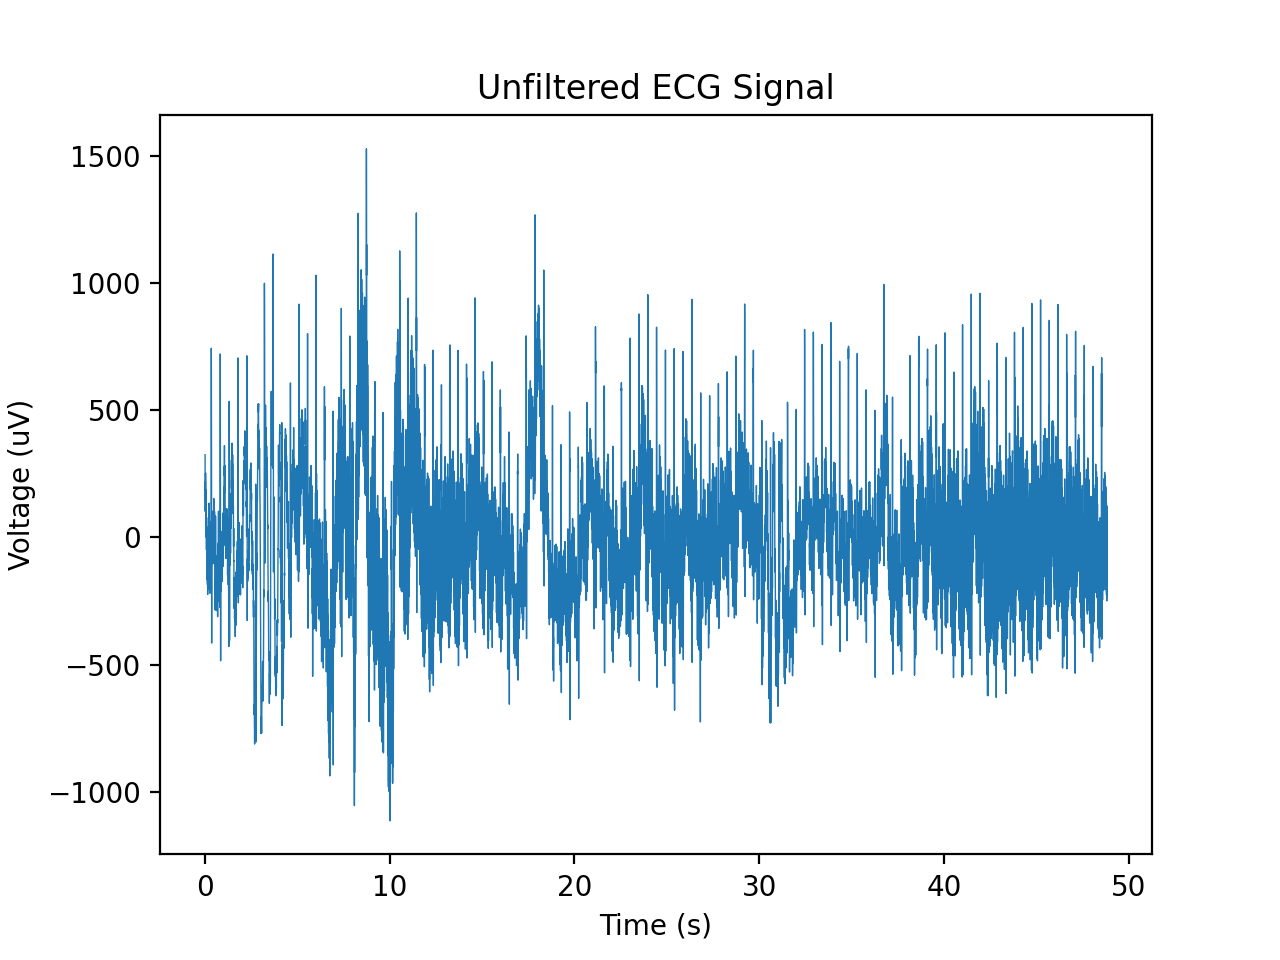

In [3]:
plt.figure()
plt.plot(t, y_0, linewidth=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (uV)")
plt.title("Unfiltered ECG Signal")
plt.savefig("Graphs/Task_1_1.png")

<IPython.core.display.Javascript object>


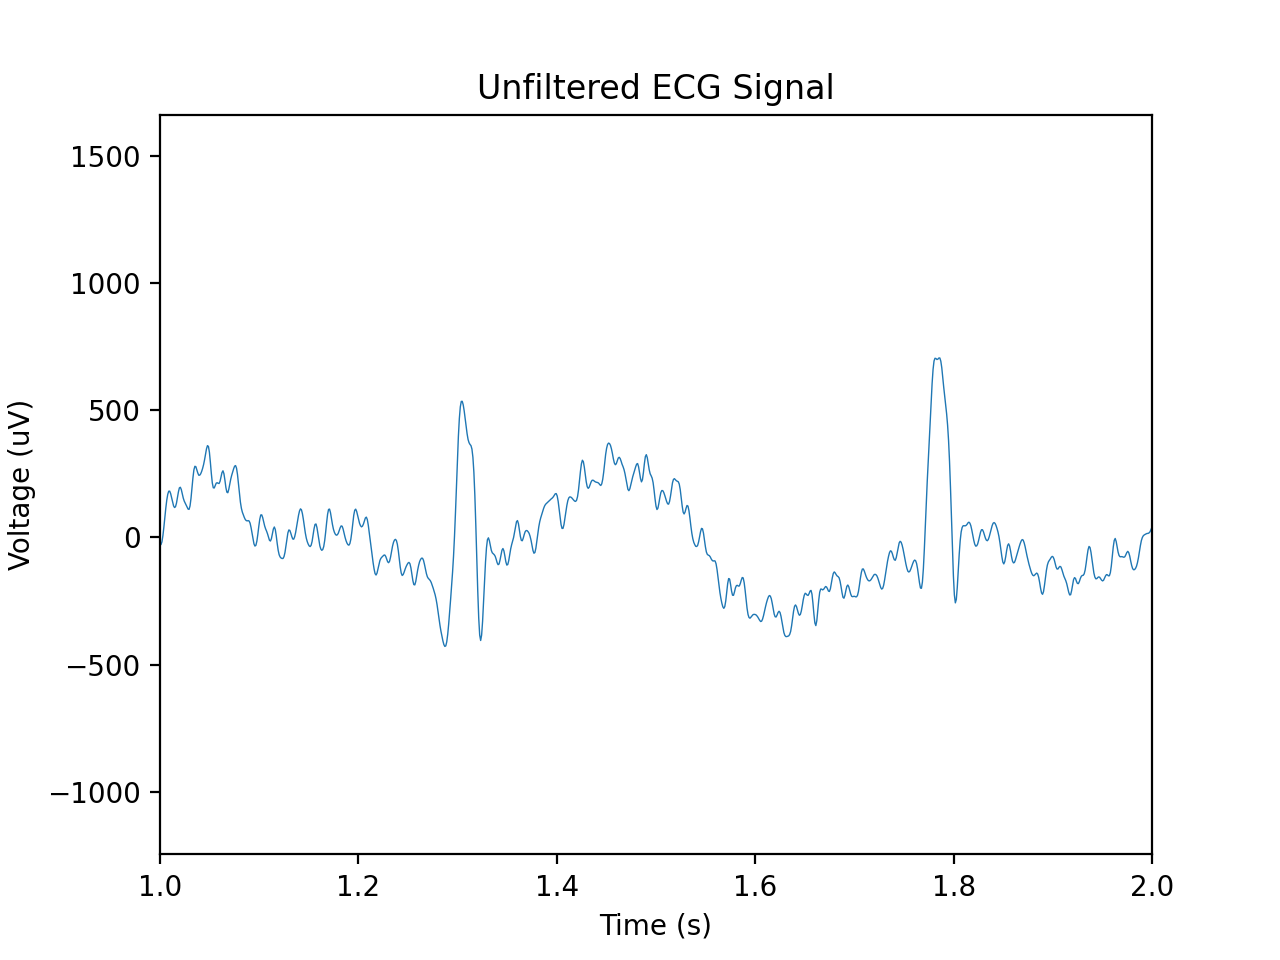

In [4]:
plt.figure()
plt.plot(t, y_0, linewidth=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (uV)")
plt.title("Unfiltered ECG Signal")
plt.xlim([1, 2])
plt.savefig("Graphs/Task_1_2.png")

<IPython.core.display.Javascript object>


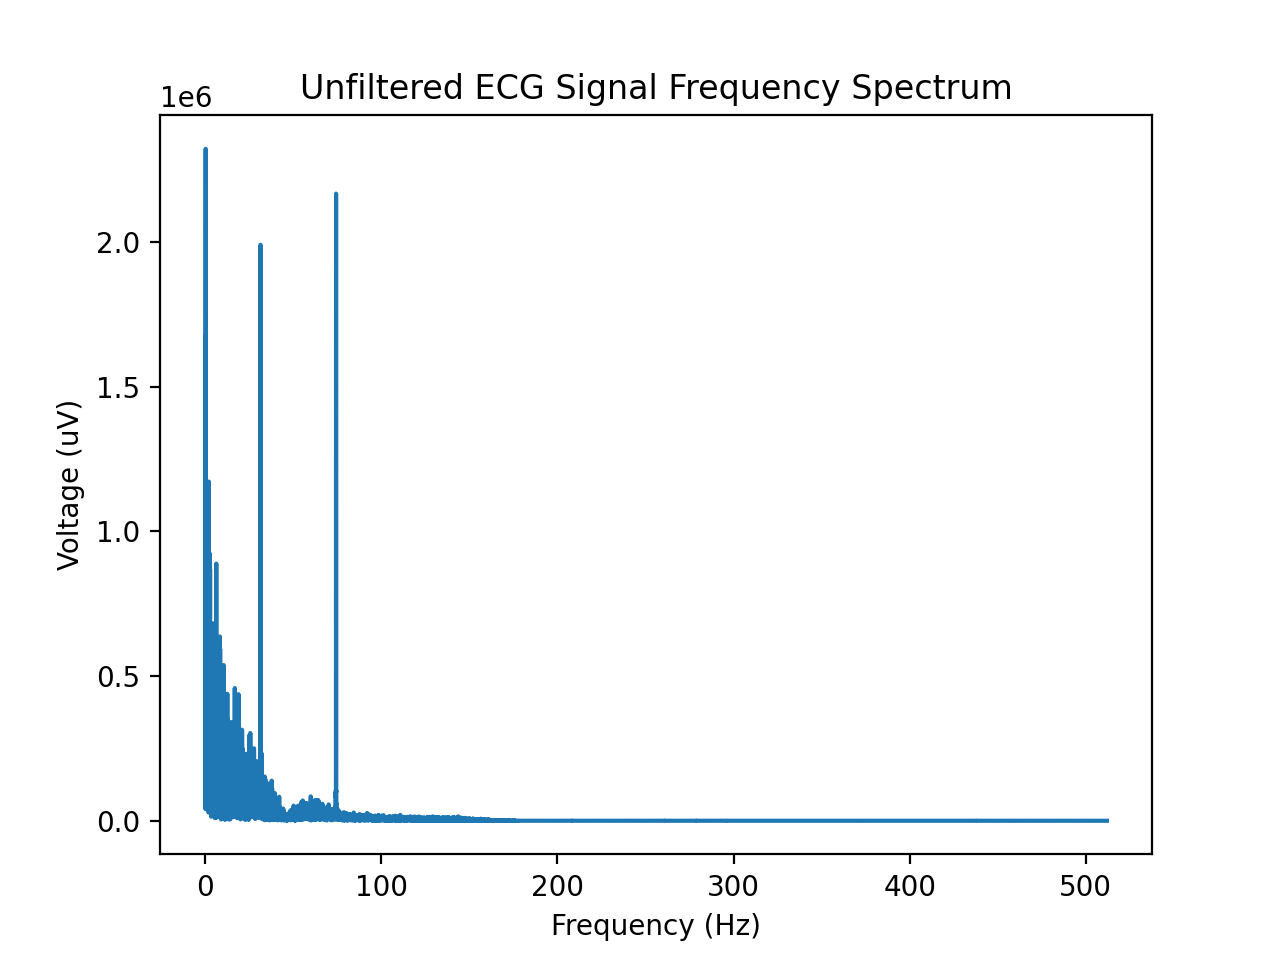

In [5]:
plt.figure()
plt.plot(f, abs(FFT_0)[:N_2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Voltage (uV)")
plt.title("Unfiltered ECG Signal Frequency Spectrum")
plt.savefig("Graphs/Task_2_1.png")

<IPython.core.display.Javascript object>


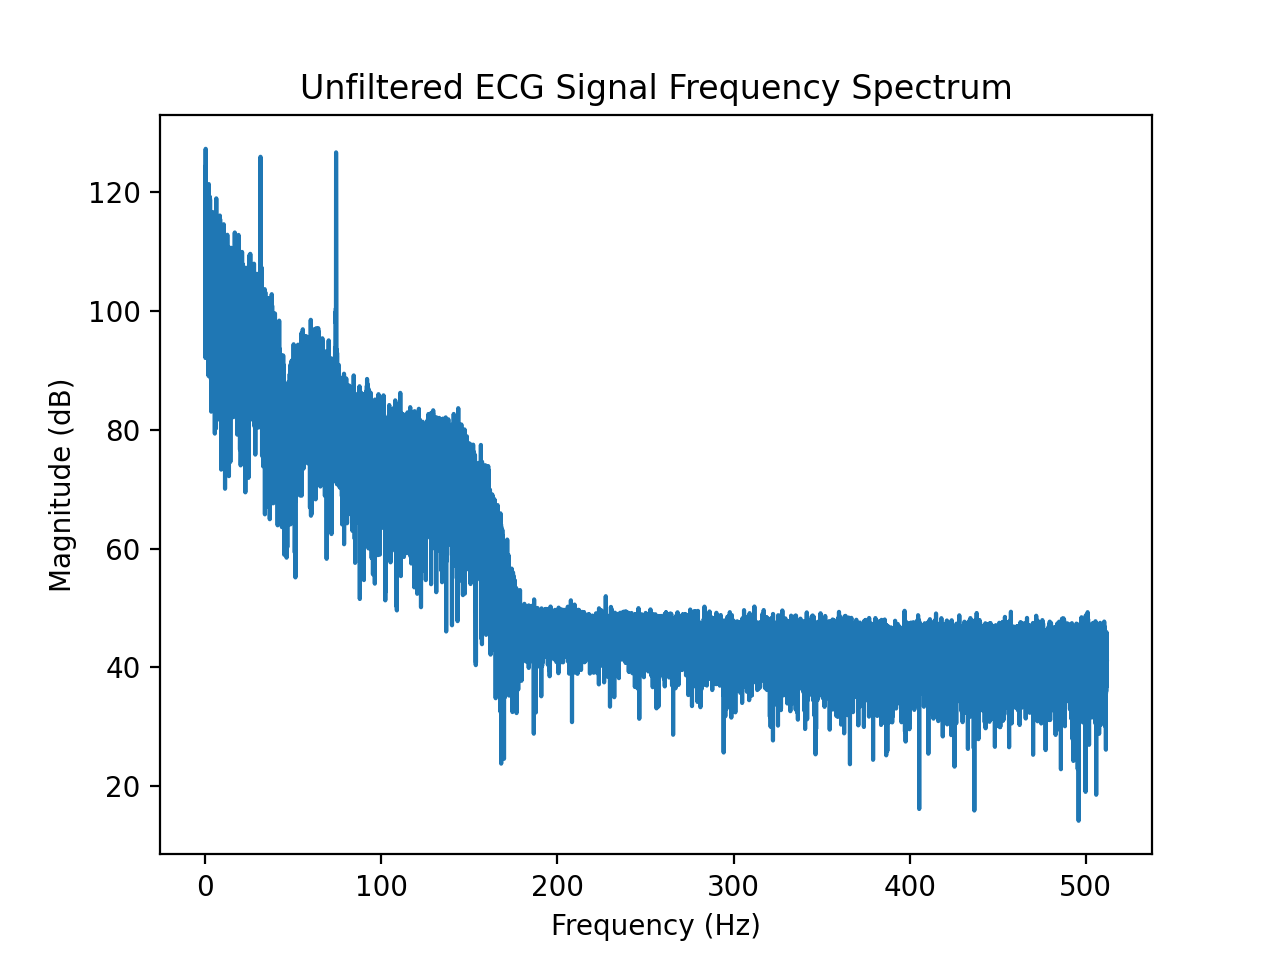

In [6]:
plt.figure()
plt.plot(f, 20*np.log10(abs(FFT_0[:N_2])))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("Unfiltered ECG Signal Frequency Spectrum")
plt.savefig("Graphs/Task_2_2.png")

In [7]:
N_Coeff = 400  # Number of coefficients
noise_f = [31.45, 74.36] # Desired stop bands, Hz

In [8]:
# Window Filtering
width_WF = 8 # Width of stop band, Hz
band_1 = [noise_f[0] -width_WF/2, noise_f[0]+width_WF/2] # Define band 1 bounds
band_2 = [noise_f[1] -width_WF/2, noise_f[1]+width_WF/2] # Define band 2 bounds

filter1_WF = signal.firwin(N_Coeff+1, band_1, window='hann', pass_zero='bandstop', fs=fs) # Filter for noise frequency 1
filter2_WF = signal.firwin(N_Coeff+1, band_2, window='hann', pass_zero='bandstop', fs=fs) # Filter for noise frequency 2
filter_WF = signal.convolve(filter1_WF, filter2_WF)  # Combined filter for noise frequencies
y_WF = signal.lfilter(filter_WF, 1, y_0) # Apply noise filters to original data
f_WF, h_WF = signal.freqz(filter_WF, 1, fs=fs) #
FFT_WF = fft(y_WF)

<IPython.core.display.Javascript object>


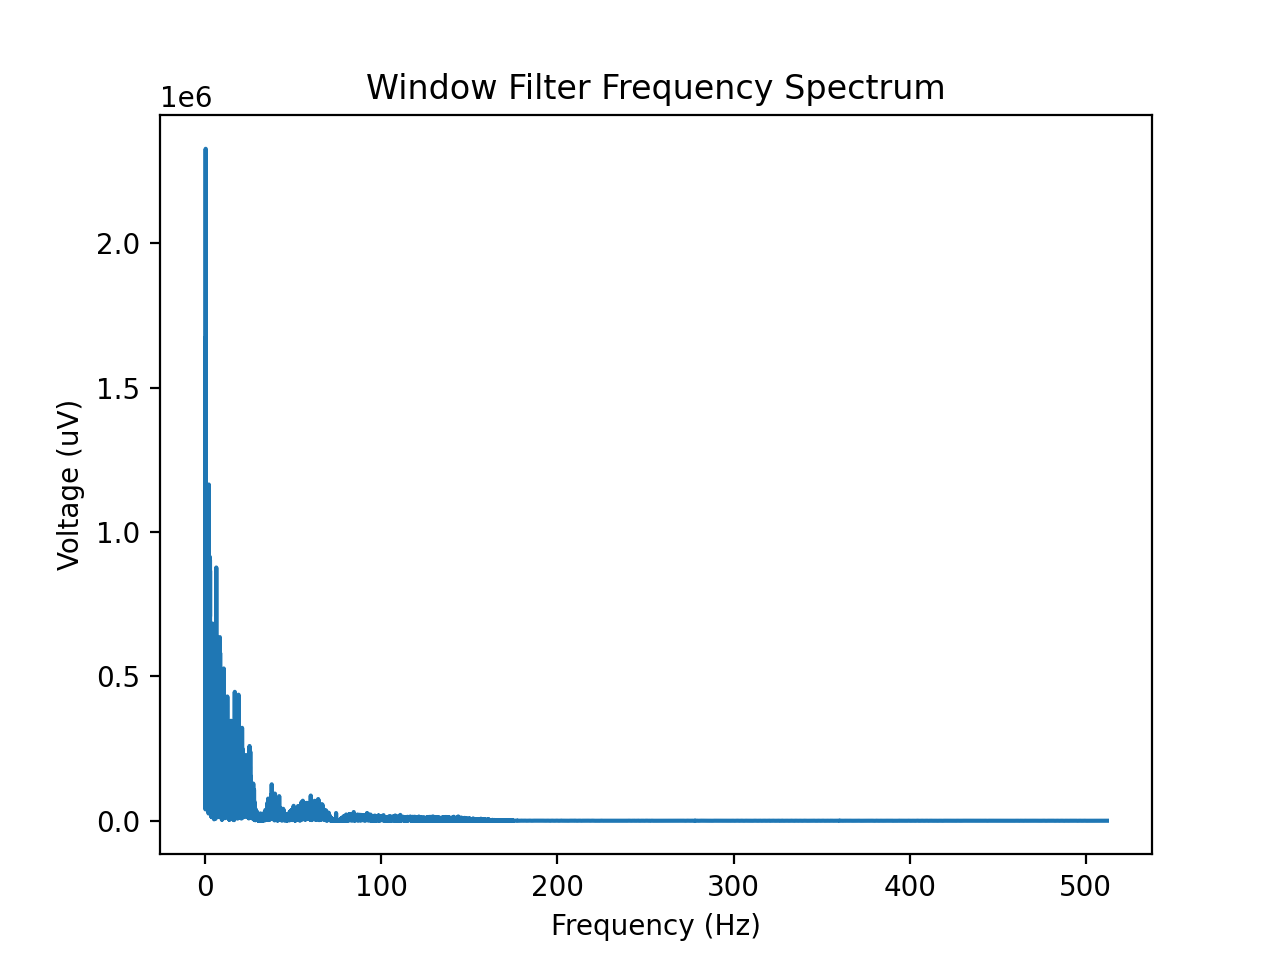

In [9]:
# Frequency Spectrum Window Filter Response
plt.figure()
plt.plot(f, abs(FFT_WF[:N_2]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Voltage (uV)")
plt.title("Window Filter Frequency Spectrum")
plt.savefig("Graphs/Task_5_1_1.png")

<IPython.core.display.Javascript object>


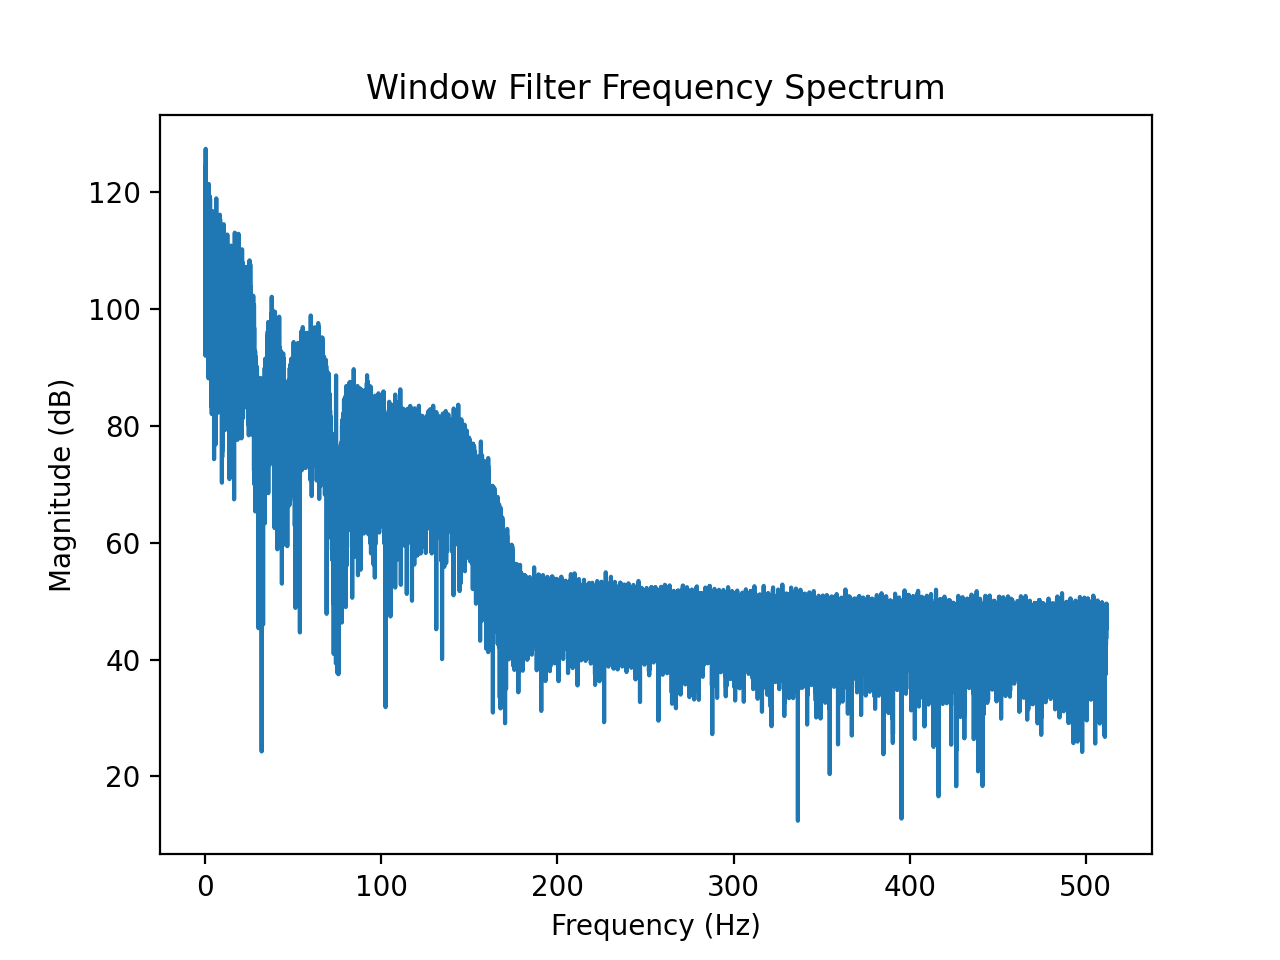

In [10]:
# Decibel Frequency Spectrum Window Filter Response
plt.figure()
plt.plot(f, 20*np.log10(abs(FFT_WF[:N_2])))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("Window Filter Frequency Spectrum")
plt.savefig("Graphs/Task_5_1_2.png")

<IPython.core.display.Javascript object>


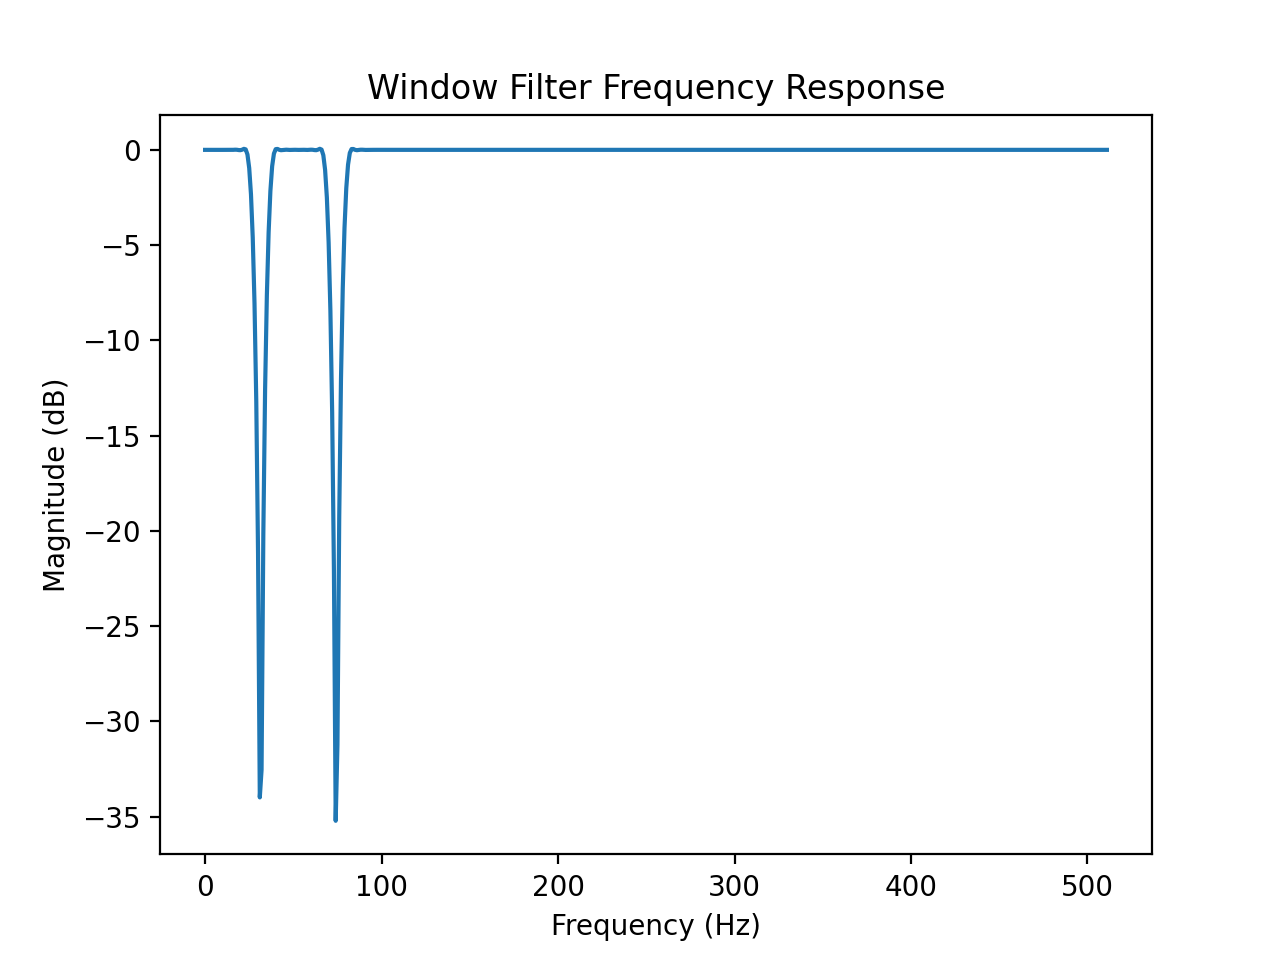

In [11]:
# Frequency Response Window Filter Response
plt.figure()
plt.plot(f_WF, 20* np.log10(abs(h_WF)))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("Window Filter Frequency Response")
plt.savefig("Graphs/Task_5_1_3.png")

<IPython.core.display.Javascript object>


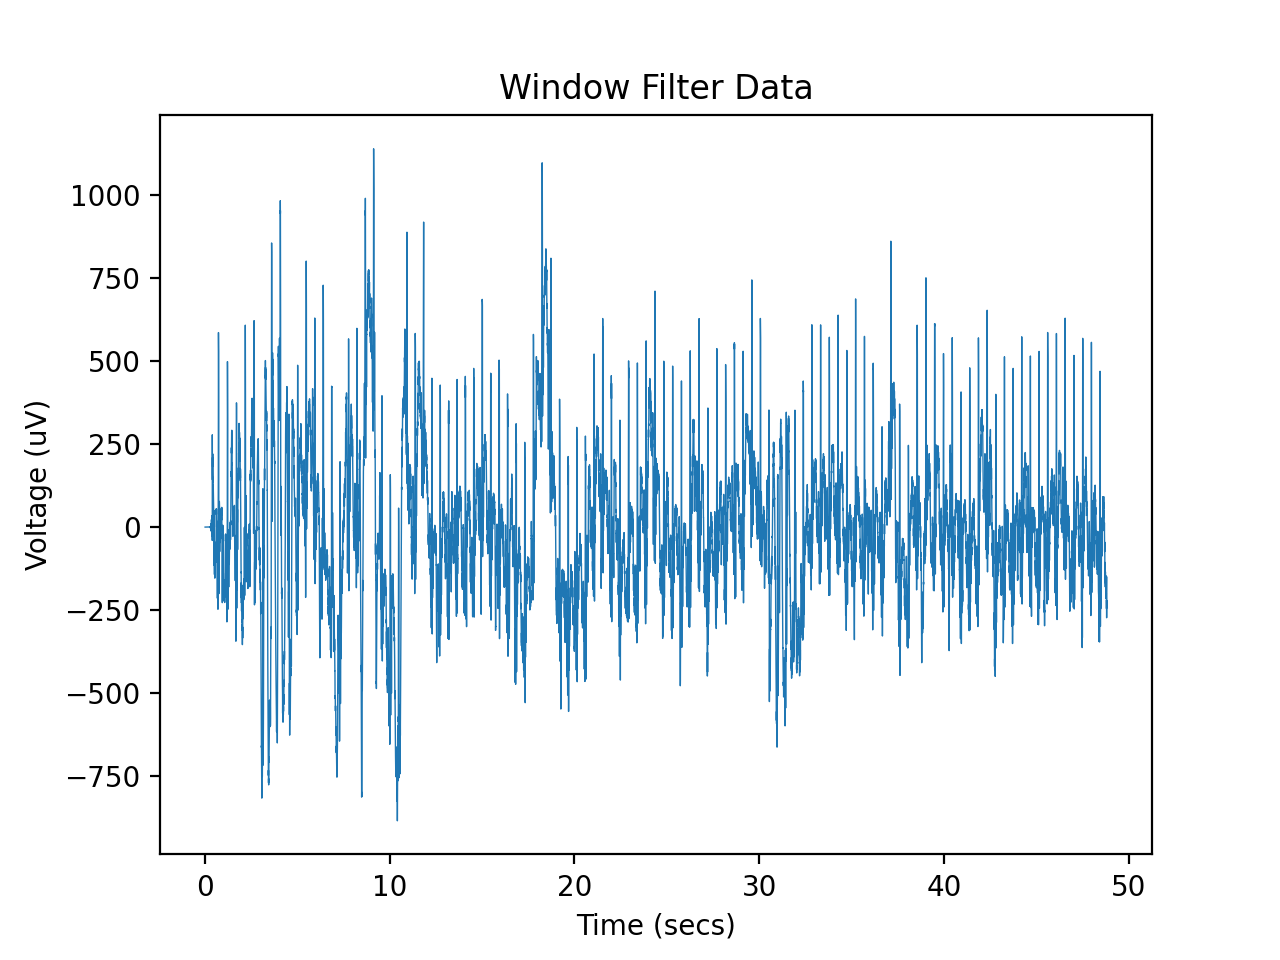

In [12]:
plt.figure()
plt.plot(t, y_WF, linewidth=0.5)
plt.xlabel("Time (secs)")
plt.ylabel("Voltage (uV)")
plt.title("Window Filter Data")
plt.savefig("Graphs/Task_5_1_4.png")

<IPython.core.display.Javascript object>


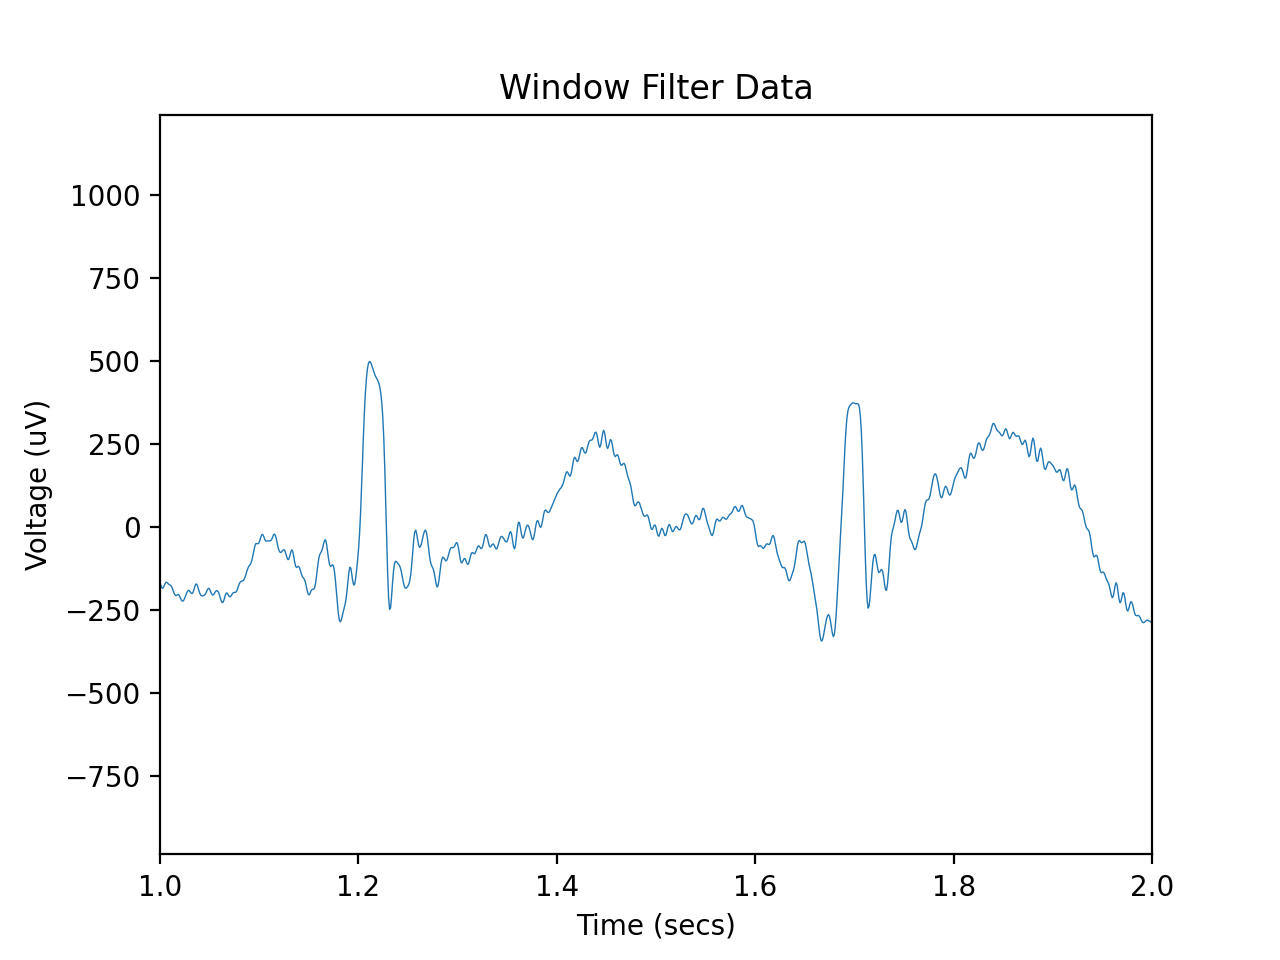

In [13]:
plt.figure()
plt.plot(t, y_WF, linewidth=0.5)
plt.xlabel("Time (secs)")
plt.ylabel("Voltage (uV)")
plt.title("Window Filter Data")
plt.xlim([1, 2])
plt.savefig("Graphs/Task_5_1_5.png")

In [14]:
trans_PM = 4 # Width of transition from pass band to stop band, Hz
width_PM = 8# Width of transition from pass band, Hz

# Filter Bands for filtering frequency 1 & 2
band1_PM = [0, noise_f[0] -width_PM-trans_PM, noise_f[0] -width_WF/2, noise_f[0]+width_PM/2, noise_f[0]+width_PM/2+trans_PM, fs/2]
band2_PM = [0, noise_f[1] -width_PM-trans_PM, noise_f[1] -width_WF/2, noise_f[1]+width_PM/2, noise_f[1]+width_PM/2+trans_PM, fs/2]
gain_PM = [1, 0, 1]

# Create filters for filtering frequency 1 & 2
filter1_PM = signal.remez(N_Coeff+1, band1_PM, gain_PM, fs=fs) # Filter frequency 1
filter2_PM = signal.remez(N_Coeff+1, band2_PM, gain_PM, fs=fs) # Filter frequency 2
filter_PM = signal.convolve(filter1_PM, filter2_PM) # Combined Filter

y_PM = signal.lfilter(filter_PM, 1, y_0) # Filter original data in time domain
f_PM, h_PM = signal.freqz(filter_PM, 1, fs=fs) # Return filter frequency response
FFT_PM = fft(y_PM) # Filtered data frequency domain response

<IPython.core.display.Javascript object>


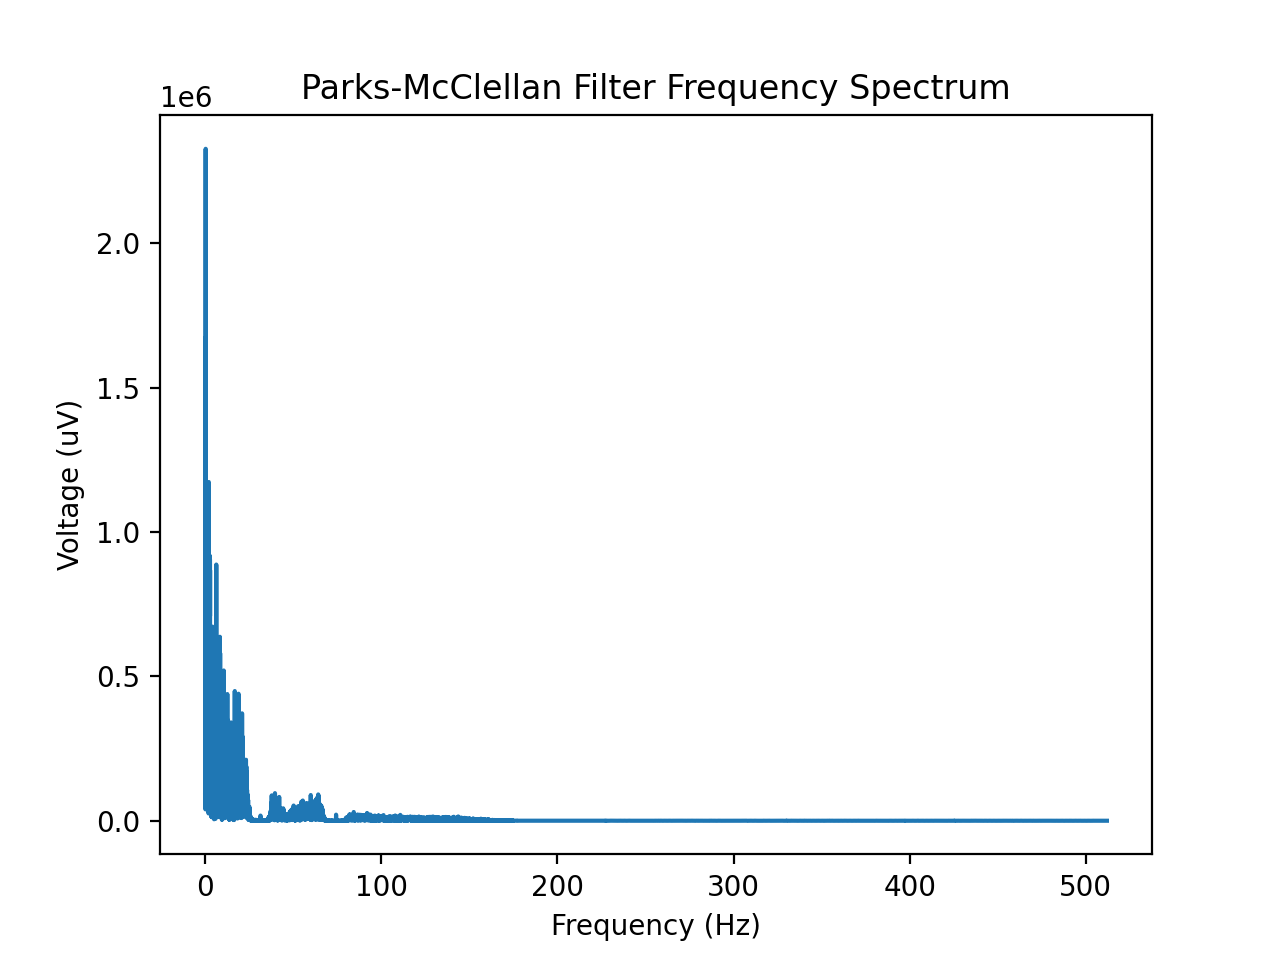

In [15]:
plt.figure()
plt.plot(f, abs(FFT_PM[:N_2]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Voltage (uV)")
plt.title("Parks-McClellan Filter Frequency Spectrum")
plt.savefig("Graphs/Task_5_2_1.png")

<IPython.core.display.Javascript object>


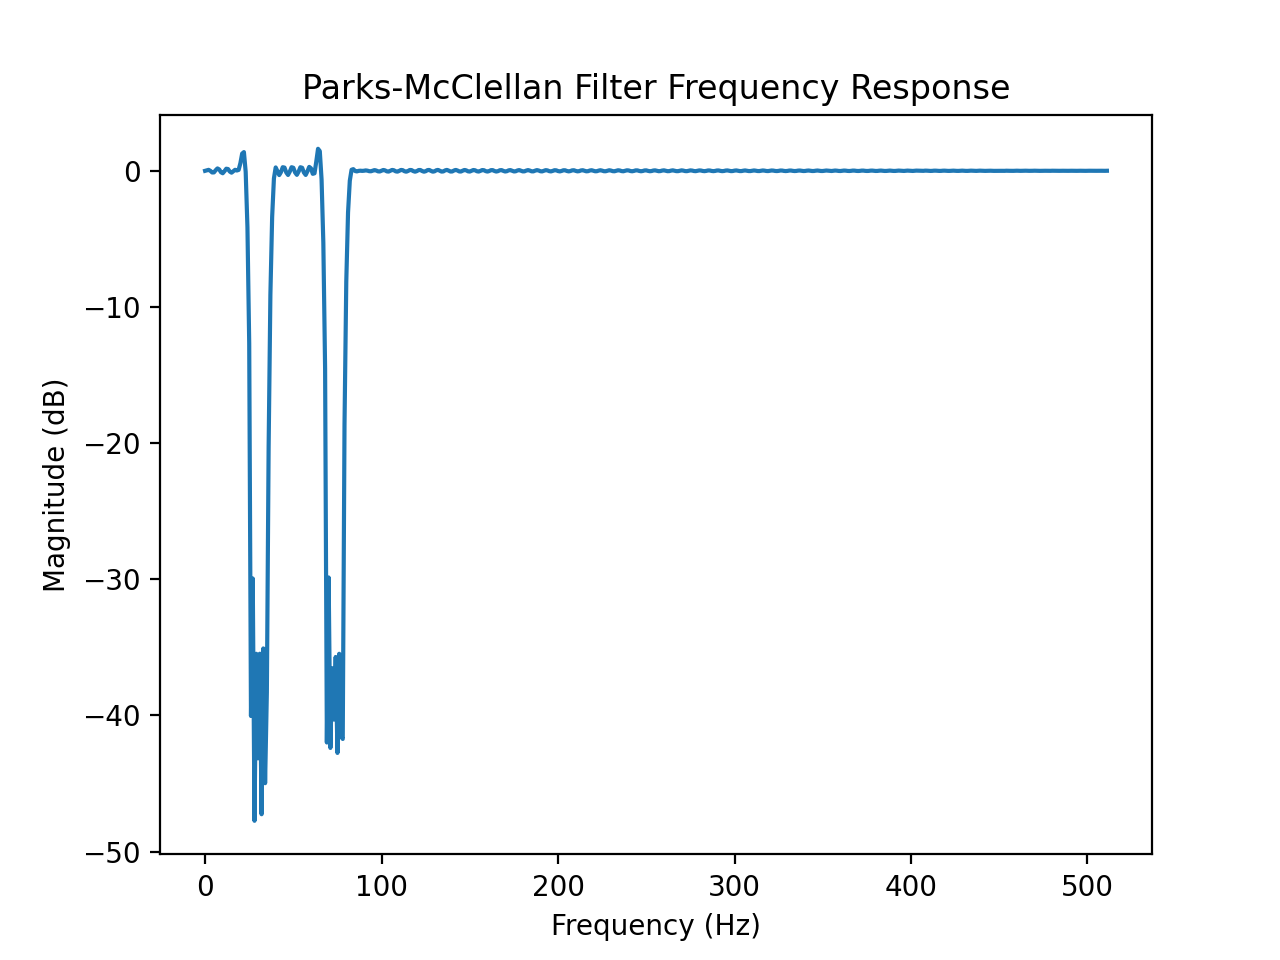

In [16]:
plt.figure()
plt.plot(f_PM, 20*np.log10(abs(h_PM)))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("Parks-McClellan Filter Frequency Response")
plt.savefig("Graphs/Task_5_2_2.png")

<IPython.core.display.Javascript object>


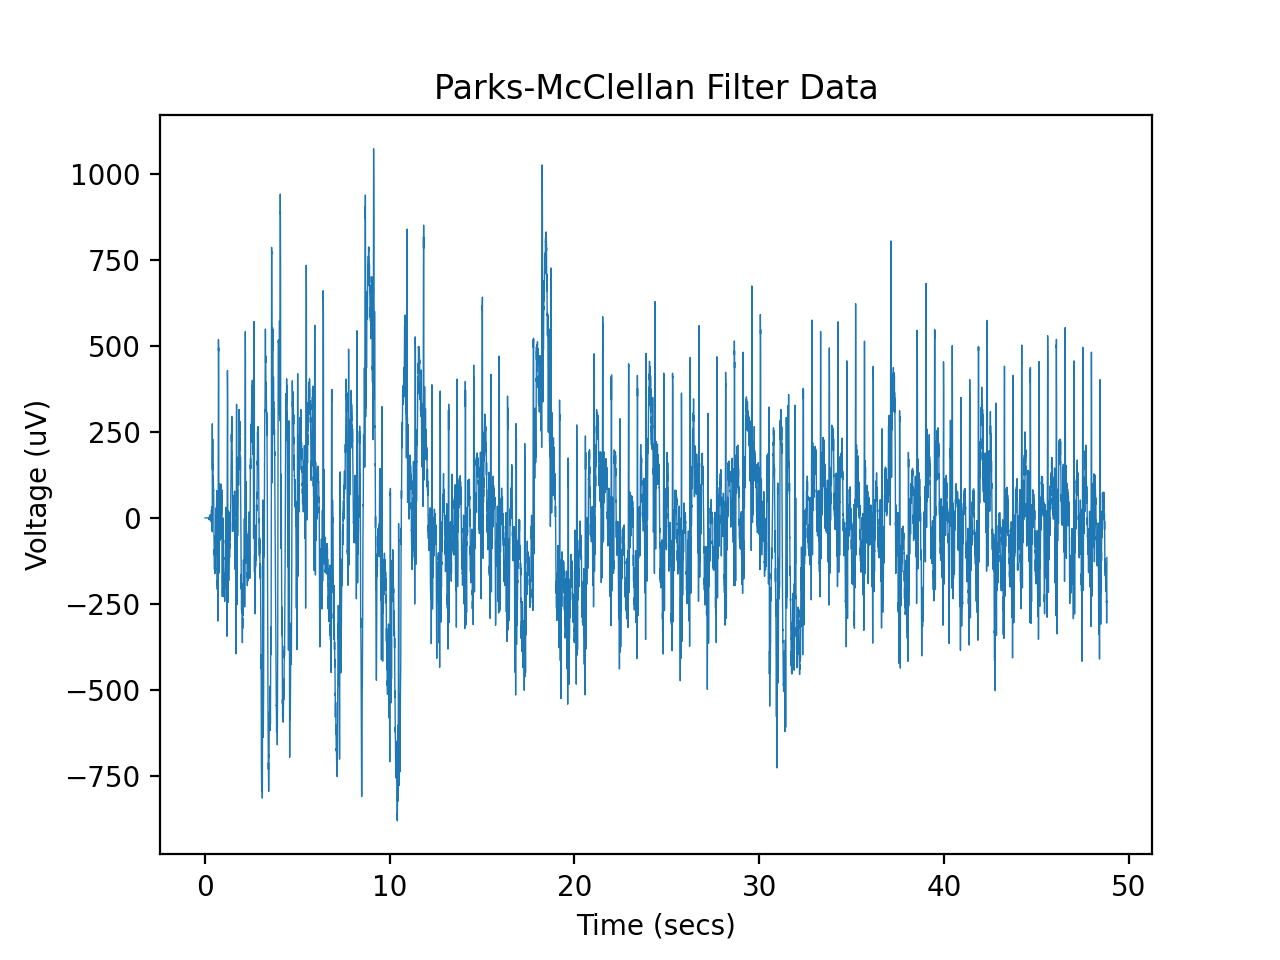

In [17]:
plt.figure()
plt.plot(t, y_PM, linewidth=0.5)
plt.xlabel("Time (secs)")
plt.ylabel("Voltage (uV)")
plt.title("Parks-McClellan Filter Data")
plt.savefig("Graphs/Task_5_2_3.png")

<IPython.core.display.Javascript object>


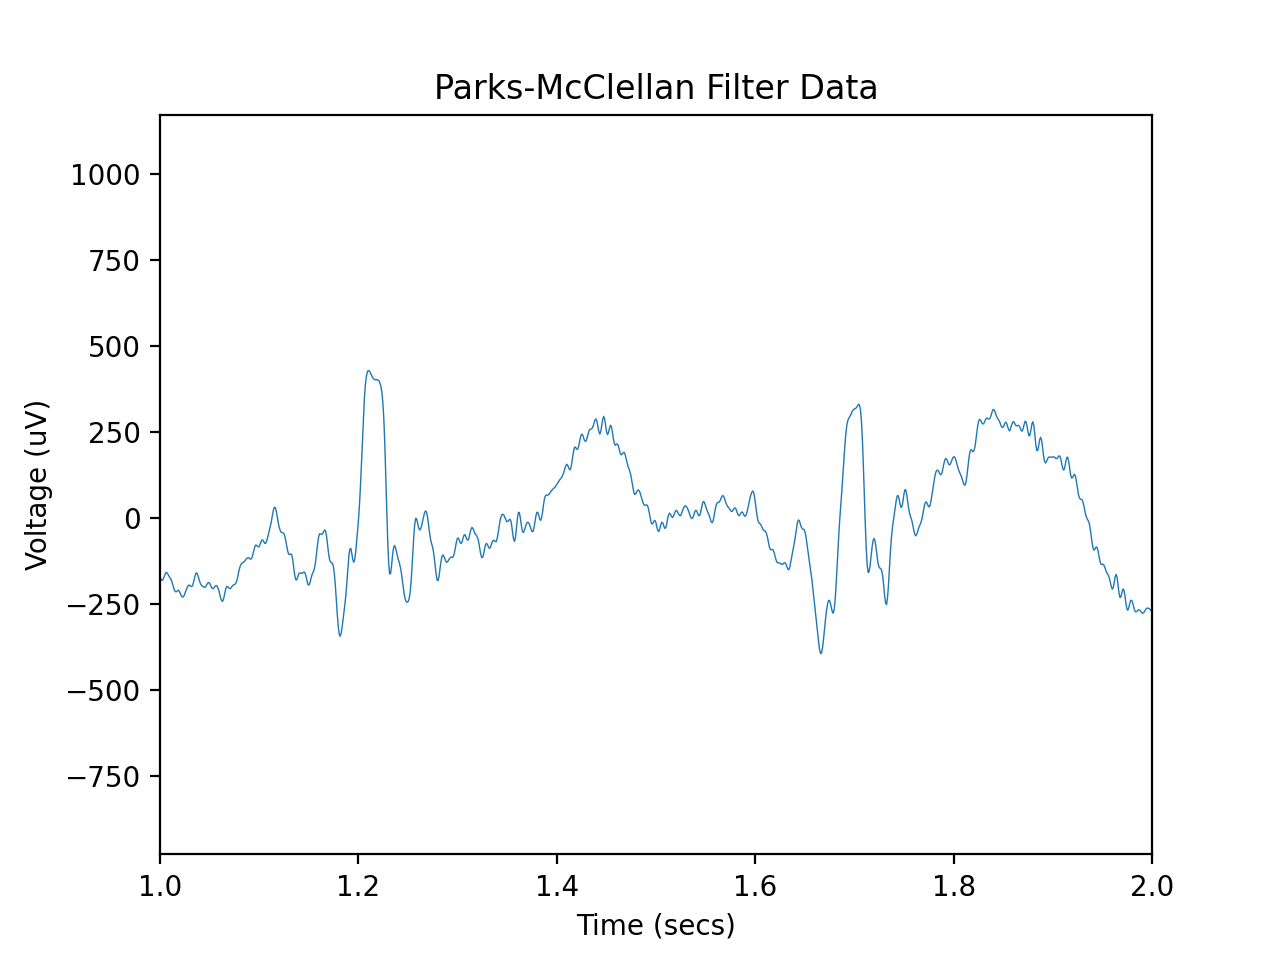

In [18]:
plt.figure()
plt.plot(t, y_PM, linewidth=0.5)
plt.xlabel("Time (secs)")
plt.ylabel("Voltage (uV)")
plt.title("Parks-McClellan Filter Data")
plt.xlim([1, 2])
plt.savefig("Graphs/Task_5_2_4.png")

In [19]:
trans_FS = 4    # Width of transition from pass band to stop band, Hz
width_FS = 8    # Width of the stop band, Hz
band1_FS = [0, noise_f[0] -width_FS/2-trans_FS, noise_f[0] -width_FS/2, noise_f[0]+width_FS/2, noise_f[0]+width_FS/2+trans_FS, fs/2]
band2_FS = [0, noise_f[1] -width_FS/2-trans_FS, noise_f[1] -width_FS/2, noise_f[1]+width_FS/2, noise_f[1]+width_FS/2+trans_FS, fs/2]
gain_FS = [1, 1, 0, 0, 1, 1] # Gain coefficients of bands

filter1_FS = signal.firwin2(N_Coeff+1, band1_FS, gain_FS, fs=fs) # Filter for noise frequency 1
filter2_FS = signal.firwin2(N_Coeff+1, band2_FS, gain_FS, fs=fs) # Filter for noise frequency 2
filter_FS = signal.convolve(filter1_FS, filter2_FS) # Filter for both noise frequencies

y_FS = signal.lfilter(filter_FS, 1, y_0) # Apply filter to time domain data
f_FS, h_FS = signal.freqz(filter_FS, 1, fs=fs) # Filter Response
FFT_FS = fft(y_FS) # Filtered Frequency Domain Response

<IPython.core.display.Javascript object>


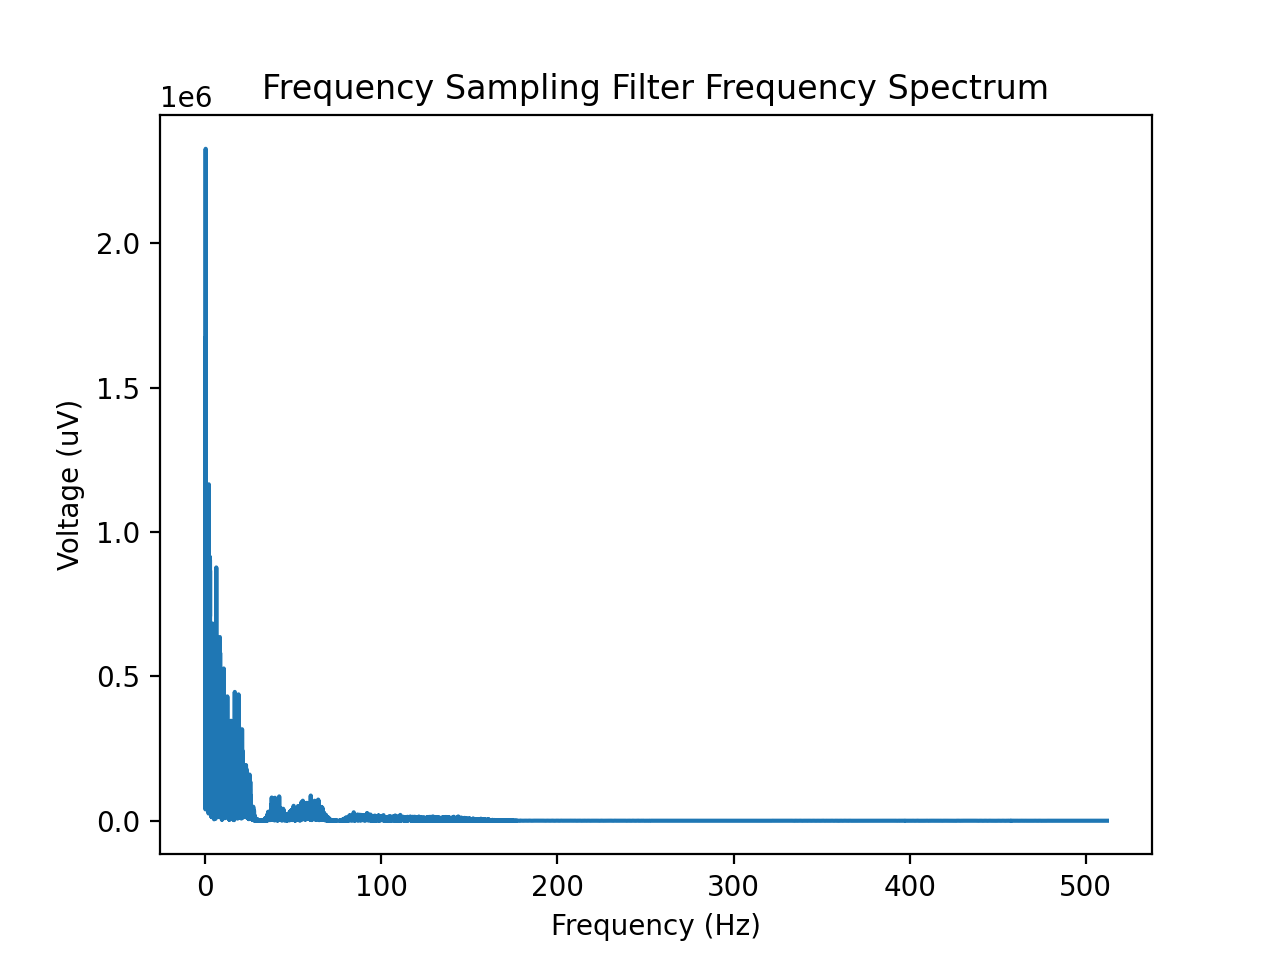

In [20]:
plt.figure()
plt.plot(f, abs(FFT_FS[:N_2]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Voltage (uV)")
plt.title("Frequency Sampling Filter Frequency Spectrum")
plt.savefig("Graphs/Task_5_3_1.png")

<IPython.core.display.Javascript object>


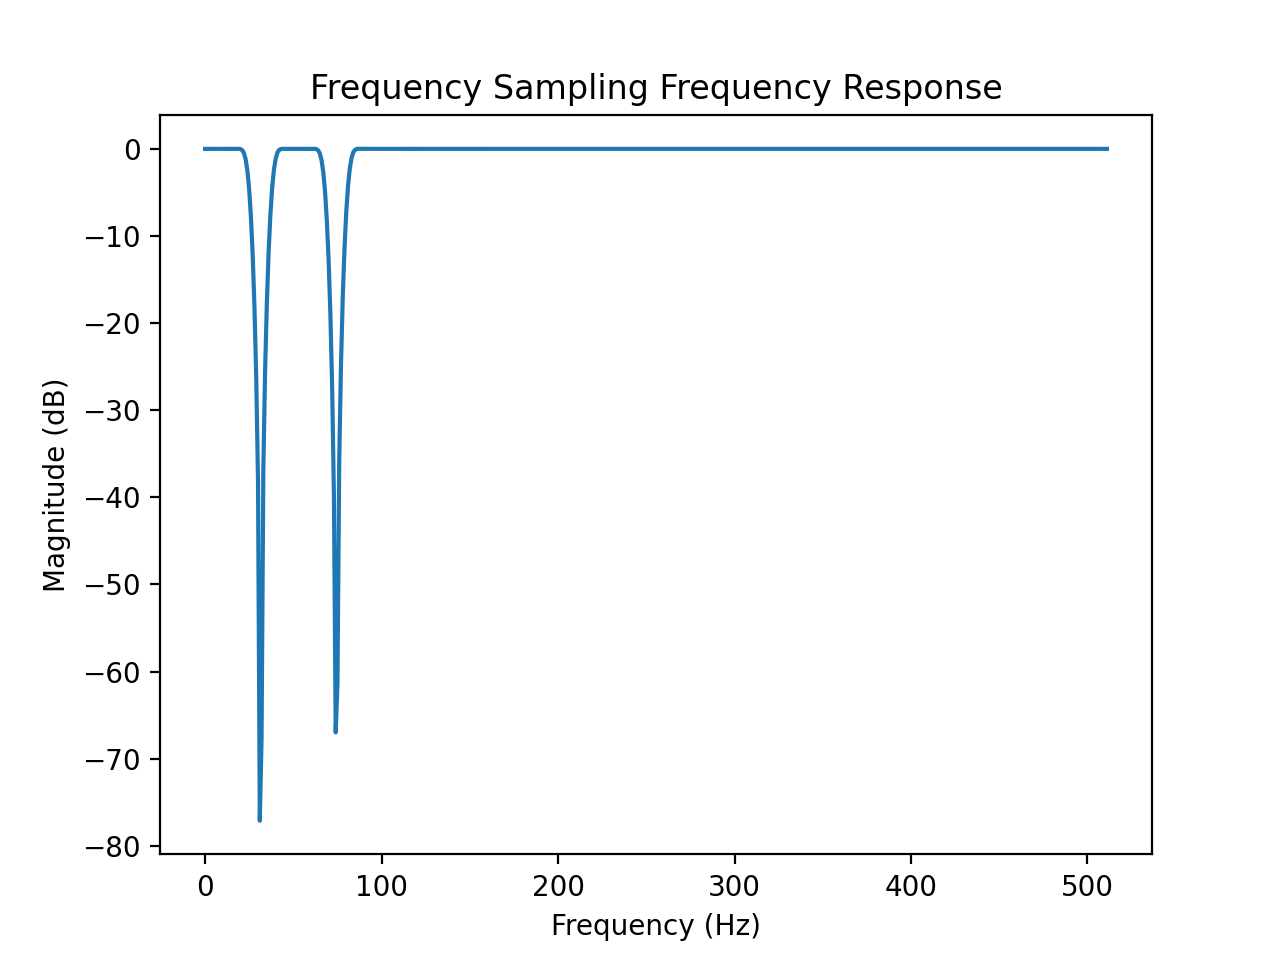

In [21]:
plt.figure()
plt.plot(f_FS, 20*np.log10(abs(h_FS)))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("Frequency Sampling Frequency Response")
plt.savefig("Graphs/Task_5_3_2.png")

<IPython.core.display.Javascript object>


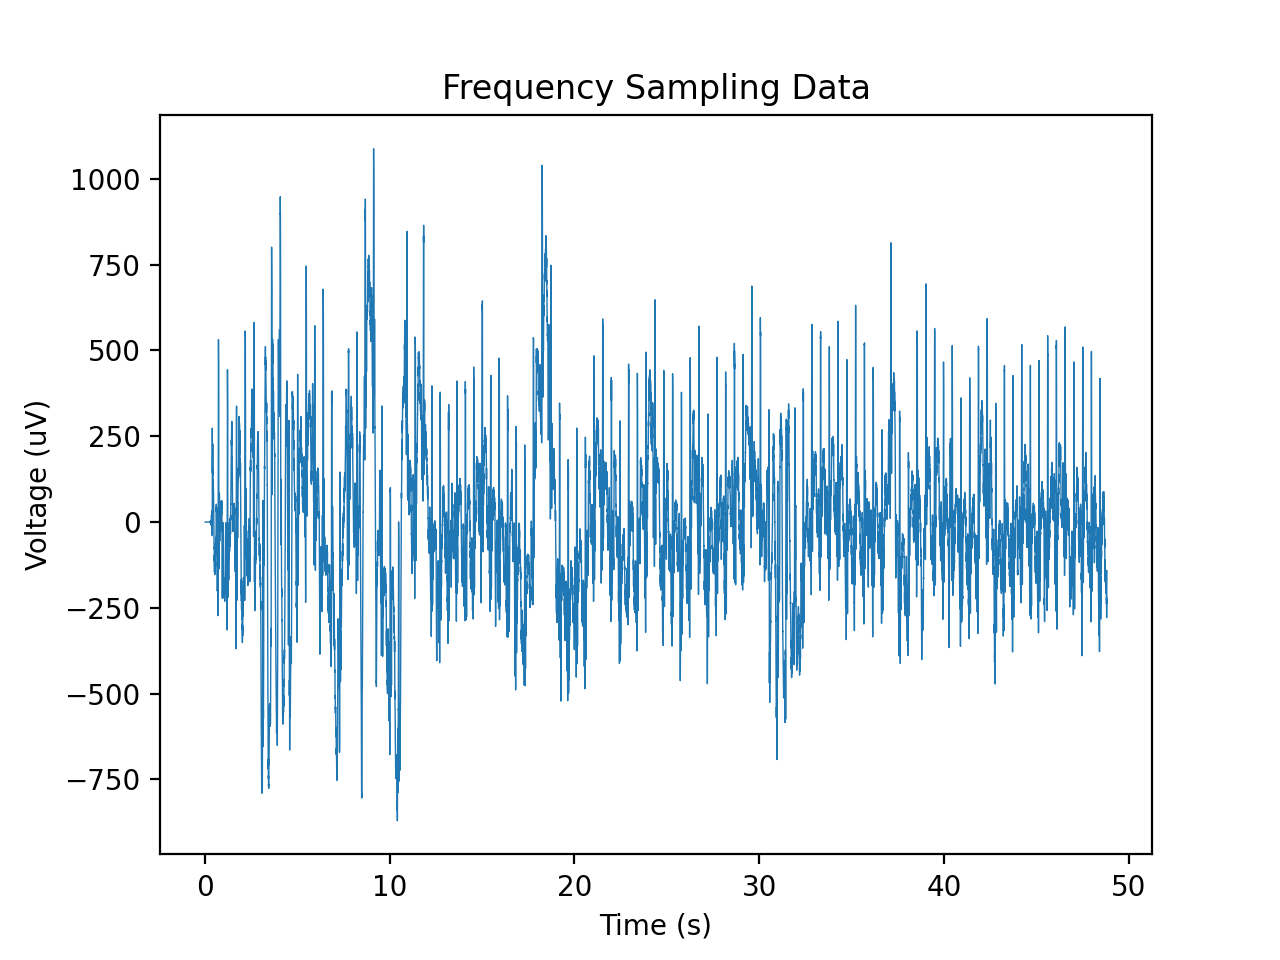

In [22]:
plt.figure()
plt.plot(t, y_FS, linewidth=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (uV)")
plt.title("Frequency Sampling Data")
plt.savefig("Graphs/Task_5_3_3.png")

<IPython.core.display.Javascript object>


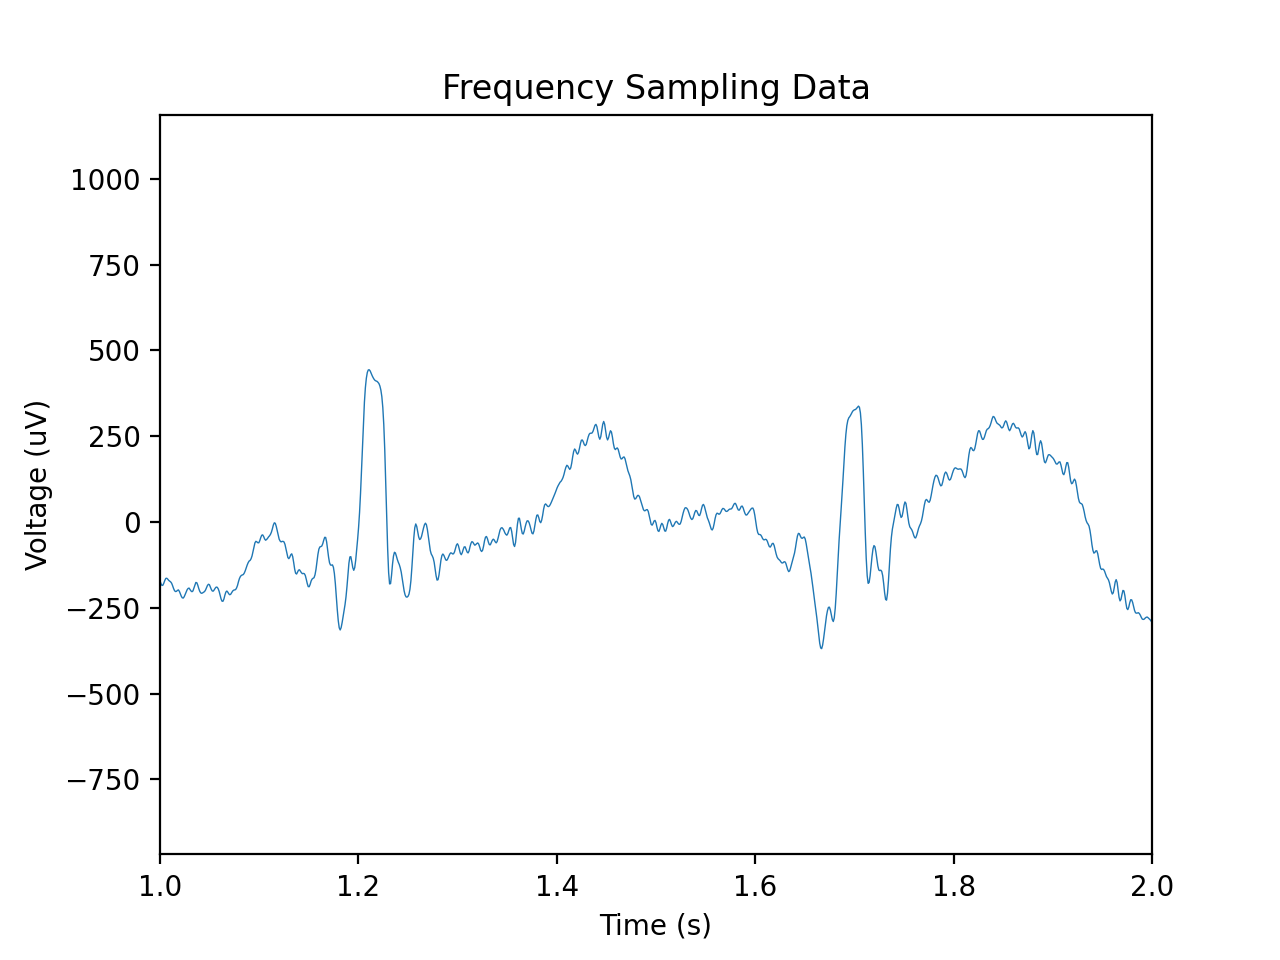

In [23]:
plt.figure()
plt.plot(t, y_FS, linewidth=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (uV)")
plt.title("Frequency Sampling Data")
plt.xlim([1, 2])
plt.savefig("Graphs/Task_5_3_4.png")

In [29]:
P_0 = np.var(y_0)
P_WF = np.var(y_WF)
P_PM = np.var(y_PM)
P_FS = np.var(y_FS)

N_WF = P_0 - P_WF
N_FS = P_0 - P_FS
N_PM = P_0 - P_PM
print("No Filter Power:                       {:.2f}".format(np.var(y_0)))
print("Window Filter Power:                   {:.2f}".format(np.var(y_WF)))
print("Parks-McLellan Filter Power:           {:.2f}".format(np.var(y_PM)))
print("Frequency Sampling Filter Power:       {:.2f}".format(np.var(y_FS)))

print("Window Filter Noise Power:             {:.2f}".format(N_WF))
print("Parks-McLellan Filter Noise Power:     {:.2f}".format(N_PM))
print("Frequency Sampling Noise Filter Power: {:.2f}".format(N_FS))

No Filter Power:                       72350.81
Window Filter Power:                   55987.94
Parks-McLellan Filter Power:           55253.62
Frequency Sampling Filter Power:       54721.80
Window Filter Noise Power:             16362.87
Parks-McLellan Filter Noise Power:     17097.19
Frequency Sampling Noise Filter Power: 17629.01
